In [1]:
import sys
sys.path.append("..")

In [2]:
from tqdm import trange

In [3]:
from environment.exploration_env import ExplorationEnv
from utils.reader import get_yaml_path, read_file

In [4]:
from agent.qagent import QAgent
from training.general_qlearning import QLearning

In [5]:
import pygame
import numpy as np

In [6]:
server_address = "localhost:50051"
client_name = "RLClient"
env = ExplorationEnv(server_address, client_name)
await env.connect_to_client()

2025-10-29 16:01:56,807 — INFO — ✓ Connected to localhost:50051



In [7]:
config_path = get_yaml_path("resources", "configurations", "exploration.yml")
config = read_file(config_path)
print(config)

simulation:
    seed: 42
    duration: 1000000
environment:
    width: 10
    height: 10
    entities:
        - agent:
            id: 00000000-0000-0000-0000-000000000001
            radius: 0.25
            withProximitySensors: true
            withLightSensors: true
            position: [1.0, 4.0]
            orientation: 0.0
            speed: 1.0
            reward: Exploration
            termination: CoverageTermination
            truncation: ObstacleAvoidance
        - obstacle:
            orientation: 0.2
            position: [ 5.6, 4.0 ]
            width: 4.0
            id: 0749c579-c64b-43be-a225-c8a0745e4fee
            height: 1.4


In [8]:
await env.init(config)

2025-10-29 16:01:57,299 — INFO — ✓ Initialization successful


In [9]:
agent = QAgent(env)
agentId = "00000000-0000-0000-0000-000000000001"
agents = { agentId: agent }

In [10]:
episodes = 50
steps = 1000

In [11]:
trainer = QLearning(env, agents, episode_count=episodes, max_steps_per_episode=steps)

In [12]:
rewards = await trainer.train(render=False, record_history=True)

Training: 100%|██████████| 50/50 [04:31<00:00,  5.43s/ep]


In [13]:
print("Reward medio ultimi 50 episodi:", sum(rewards[agentId][-50:]) / 50)

Reward medio ultimi 50 episodi: -443.3891814134615


In [19]:
eval_results = await trainer.evaluate(test_episode_count=1, max_steps_per_episode=2000,  render=True)
print("Average evaluation reward:", eval_results[agentId])

Evaluation: 100%|██████████| 1/1 [01:43<00:00, 103.54s/ep]
[00000000-0000-0000-0000-000000000001] Avg steps: 2000.0 | Avg reward: -3692.1


Average evaluation reward: {'total_reward': -3692.1499999998778, 'avg_steps': 2000.0, 'avg_total_reward': -3692.1499999998778}


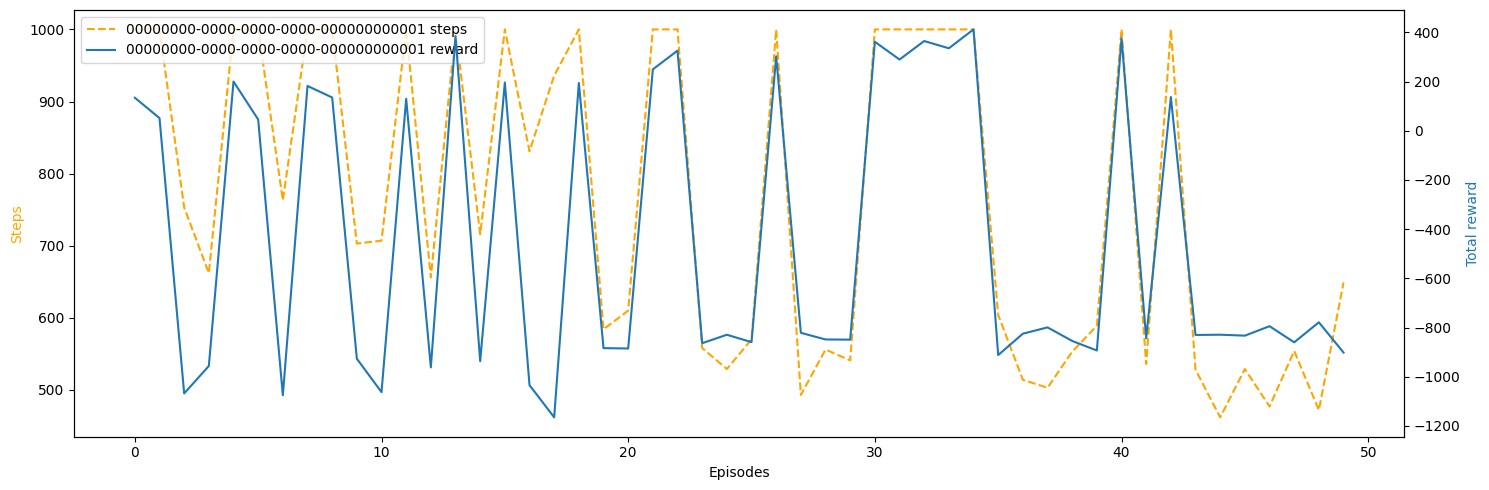

In [15]:
from utils.plotting import plot_learning_history

plot_learning_history(trainer.learning_history)